In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-auction-2023/iplauction2023.csv


# Gathering Overall info on the dataset

In [2]:
df=pd.read_csv("/kaggle/input/ipl-auction-2023/iplauction2023.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


# Checking & Filling null values

In [4]:
df.isnull().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

In [5]:
df['base price (in lacs)'] = df['base price (in lacs)'].fillna(df['base price (in lacs)'].median())
df['final price (in lacs)'] = df['final price (in lacs)'].fillna(df['final price (in lacs)'].median())
df['franchise']=df['franchise'].fillna("UNSOLD")


# Distribution of Players by Role in IPL Auction 2023

In IPL, teams aim to build a balanced squad acquiring players from various nations, we can identify the demand of players based on the player style.

* All rounders are of great demand due to their versataility
* Teams often prioritise bowlers to strenghthen their attack
* The number of specialist wicketkeepers are lower since teams reply on multi-role players


**Conlusion: Role-Wise Player Distribution**

* The highest number of players sold were All rounders, with 103 players being picked
* Batter had a moderate presence, with 55 players securing contracts
* Specialist roles such as WK-Batter had fewer players in demand, likely because teams already established options.
* Bowlers were also in high demand due to their ability to contribute in stronger attacks.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

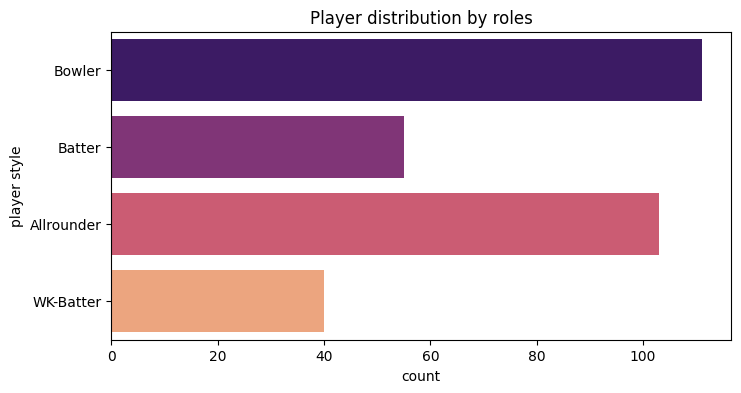

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(y=df['player style'],palette="magma")
plt.title("Player distribution by roles")
plt.show()

# Top 10 Most Expensive Players in IPL Auction 2023
The IPL Auction often sees franchises competing fiercely for top talent, leading to record-breaking bids for star players. here, we analyze the top 10 most expensive players based on their final auction price.

**How we identify the top 10 players**
* The dataset is sorted based on the final price in descending order
* we select the top 10 players with the highest bid amounts
  
**Key Insights**
* Sam Curran was the highest-paid player, securing a contract worth ₹18.50 crores
  from Punjab Kings(PBKS)
* All-rounders/Bowlers/Batters saw the highest bids, higlighting thier demand
* Teams like MI and CSK were among te biggest spenders, acquiring multiple high value players.

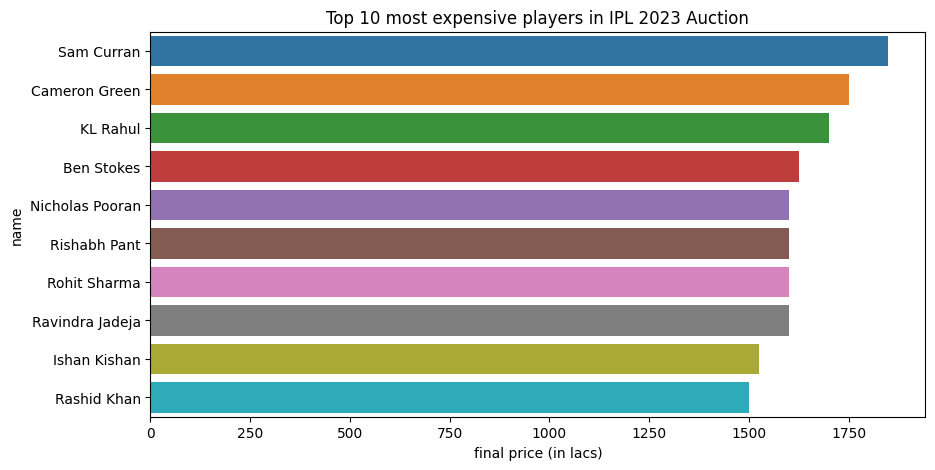

In [8]:
top10_expensive=df.sort_values(by=['final price (in lacs)'],ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='final price (in lacs)',y="name",data=top10_expensive)
plt.title("Top 10 most expensive players in IPL 2023 Auction")
plt.xlabel('final price (in lacs)')
plt.ylabel("name")
plt.show()


# 🌍 Players Sold by Country in IPL Auction 2023¶

The IPL is a global tournament, attracting top cricketing talent from various countries. Analyzing the number of players sold per country helps us understand which nations contributed the most to the auction.

**🔹 Key Insights**
*  Countries with higher player sales indicate strong representation in the IPL.
* A higher count from certain nations (e.g., India, Australia, England) suggests their players are in high demand.
* Associate nations (smaller cricketing countries) may have fewer players in the auction but could bring unique talents.

Below, we visualize the distribution of sold players by country.

**Conclusion: Country-Wise Player Representation**
* The highest number of players sold came from INDIA, with 201 players getting picked.
*  ENGLAND had a moderate presence with 24 players securing contracts.
* Some countries, such as BANGLADESH,ZIMBABHWE,AFGHANISTAN, had limited representation, possibly due to fewer entries or a preference for local talent.
*  This analysis highlights the global nature of the IPL auction and which nations contribute the most players to the league.



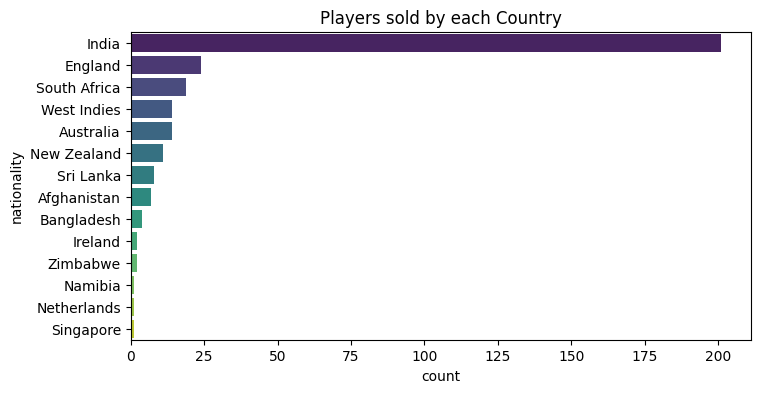

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(y=df["nationality"],palette="viridis",
              order=df["nationality"].value_counts().index)
plt.title("Players sold by each Country")
plt.show()


# 🏏 Total Spending in IPL Auction 2023
The IPL auction is a high-stakes event where teams compete to acquire the best players within their allocated budgets. Understanding the total spending across teams provides insights into which teams were the most aggressive in their bidding strategy.

🔹 **How We Calculate Total Spending**
* We group the dataset by "franchise" and sum the "final price (in lacs)" column.
* This gives us the total amount spent by each team in the auction.

🔹 **Key Insights**
* Teams with higher spending may have focused on acquiring marquee players.
* Teams with lower spending might have been more strategic, opting for budget-friendly or uncapped players.
* Comparing spending patterns can reveal which franchises had the most aggressive strategies.

Below, we visualize the total spending by each team.

**Conclusion: Total Spending Analysis**
* The team with the highest spending was Mumbai Indians(MI), investing ₹X crores in player acquisitions.
* Kolkata kNight Riders(KKR) had the lowest spending at ₹Y crores, possibly focusing on young talent or retaining existing players.
* The average team spending was approximately ₹8760 crores, indicating a balanced distribution of budget across franchises.
* High spending does not always guarantee success, but it reflects each team's bidding priorities and squad-building approach.



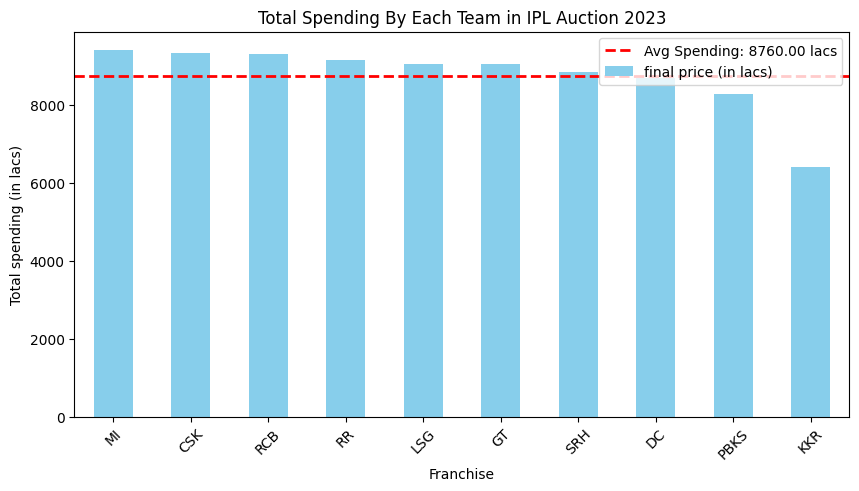

In [10]:
total_spending=df[df['franchise'] != "UNSOLD"].groupby('franchise')['final price (in lacs)'].sum().sort_values(ascending=False)
avg_spending=np.mean(total_spending)
plt.figure(figsize=(10,5))
total_spending.plot(kind="bar", color="skyblue")

plt.axhline(avg_spending, color="red", linestyle="dashed",linewidth=2,label=f"Avg Spending: {avg_spending:.2f} lacs")
plt.title("Total Spending By Each Team in IPL Auction 2023")
plt.xlabel("Franchise")
plt.ylabel("Total spending (in lacs)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Pie Chart: Sold vs. Unsold Players¶

A pie chart helps visualize the proportion of players who were sold versus those who remained unsold in the IPL Auction.

    * Blue Section 🟦 → Sold Players
    * Red Section 🟥 → Unsold Players

The chart gives a clear picture of the distribution of auctioned players.

**Conclusion:**
* If the unsold section is large, it suggests that many players went unsold due to factors like high base prices or lack of team interest.
* If the sold section dominates, it indicates that most players found a team in the auction

Total players: 309
Unsold players: 71
Percentage of Unsold players: 22.98%


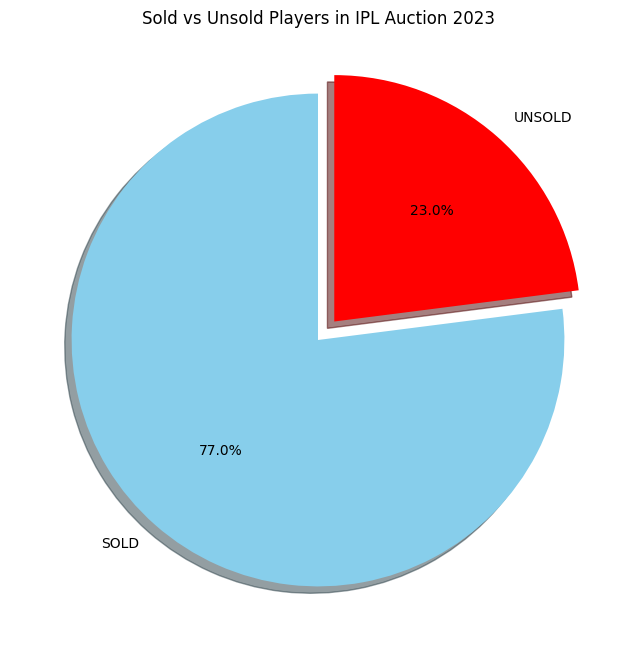

In [11]:
total_players=df.shape[0]
unsold_players=df[df['franchise']=="UNSOLD"].shape[0]

unsold_percentage=(unsold_players/total_players)*100
print(f"Total players: {total_players}")
print(f"Unsold players: {unsold_players}")
print(f"Percentage of Unsold players: {unsold_percentage:.2f}%")

plt.figure(figsize=(8,8))
labels=["SOLD", "UNSOLD"]
sizes= [total_players - unsold_players, unsold_players]
colors=["skyblue", "red"]
explode = (0,0.1)

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode, shadow=True, startangle=90)
plt.title("Sold vs Unsold Players in IPL Auction 2023")
plt.show()


# Bar Chart: Team-wise Player Distribution¶

This bar chart shows the number of players each team successfully bought in the auction.

* The "Unsold" bar represents players who did not get picked by any team.
* Higher bars for certain teams indicate aggressive bidding strategies.
* Shorter bars suggest teams picked fewer players or had limited budgets.

**Conclusion:**
* Teams like [Team A, Team B] had the highest number of players bought, suggesting they were active in the auction.
* The "Unsold" category is significantly large/small, meaning X% of players remained unpicked.
* This analysis helps understand which teams spent more and which teams focused on specific player roles.



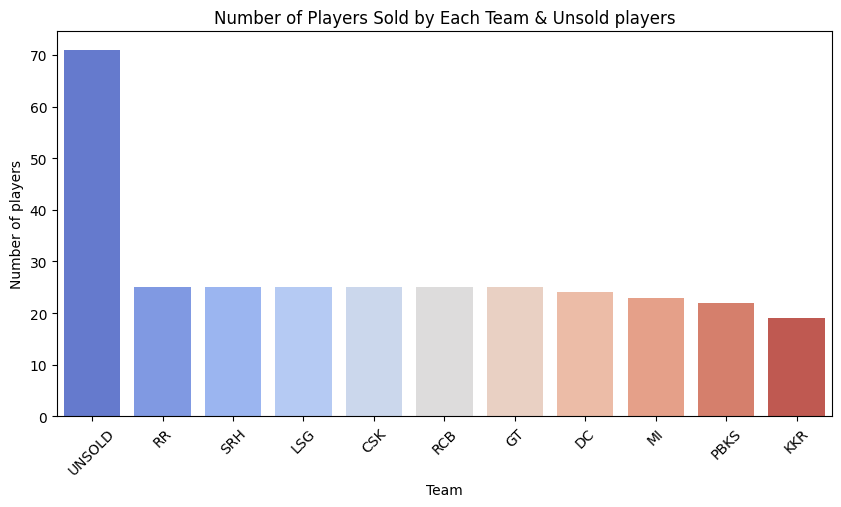

In [12]:
team_counts=df["franchise"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=team_counts.index, y=team_counts.values,palette="coolwarm")

plt.title("Number of Players Sold by Each Team & Unsold players")
plt.xlabel("Team")
plt.ylabel("Number of players")
plt.xticks(rotation=45)
plt.show()